# Battle of Neighborhood

### Table of contents

##### Introduction: Business Problem 
##### Data
##### Methodology
##### Analysis
##### Results and Discussion
##### Conclusion

### Introduction: Business Problem

##### The aim of this project is to find a safe and secure location for opening of commercial establishments in Toronto, Canada. Specifically, this report will be targeted to stakeholders interested in opening any business place like Grocery Store in Toronto City, Canada.

##### The first task would be to choose the safest borough by analysing crime data for opening a grocery store and short listing a neighborhood, where grocery stores are not amongst the most commom venues, and yet as close to the city as possible.

##### We will make use of our data science tools to analyse data and focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood where grocery store is not amongst the most common venue can be selected.

### Data

#### Based on definition of our problem, factors that will influence our decission are:

##### Finding the safest borough based on crime statistics
##### Finding the most common venues
##### Choosing the right neighbouhood within the borough
##### We will be using the geographical coordinates of Toronto to plot neighborhoods in a borough that is safe, and finally cluster our neighborhoods and present our findings.

#### Following data sources will be needed to extract/generate the required information:

#### Part 1 - Using the real world Data set of Toronto Crime Data from the website of Toronto Police Department. - A dataset consisting of the crime statistics of each Neighborhood in Toronto along with type of crime. (https://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-/data?geometry=-80.289%2C43.557%2C-78.436%2C43.904)

#### Part 2 - Gathering additional information about the borough from the wikipedia about the borough in Toronto. (https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto)¶

#### Part 3 - Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighborhood's co-ordinates.This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.¶

#### Part 4 - Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighborhood along with co-ordinates. This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium

### Part 1: Using a real world data set from Toronto Police Department containing the number of crimes per neighborhood

#### Url : https://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-/data?geometry=-80.289%2C43.557%2C-78.436%2C43.904

### Importing all the necessary Libraries

In [50]:
import numpy as np
import pandas as pd

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
!pip install folium
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.0.2
Libraries imported


### Reading from the Dataset

In [51]:
crime_df = pd.read_csv("https://raw.githubusercontent.com/Vishesh11/Battle-of-Neighborhood/master/Neighbourhood_Crime_Rates_(Boundary_File)_.csv", index_col=None)
crime_df.drop(['Hood_ID','Population','Assault_2014','Assault_2015','Assault_2016','Assault_2017','Assault_2018','Assault_2019','Assault_CHG','Assault_Rate_2019','AutoTheft_2014','AutoTheft_2015','AutoTheft_2016','AutoTheft_2017','AutoTheft_2018','AutoTheft_2019','AutoTheft_CHG','AutoTheft_Rate_2019','BreakandEnter_2014','BreakandEnter_2015','BreakandEnter_2016','BreakandEnter_2017','BreakandEnter_2018','BreakandEnter_2019','BreakandEnter_CHG','BreakandEnter_Rate_2019','Homicide_2014','Homicide_2015','Homicide_2016','Homicide_2017','Homicide_2018','Homicide_2019','Homicide_AVG','Homicide_CHG','Homicide_Rate_2019','Robbery_2014','Robbery_2015','Robbery_2016','Robbery_2017','Robbery_2018','Robbery_2019','Robbery_CHG','Robbery_Rate_2019','TheftOver_2014','TheftOver_2015','TheftOver_2016','TheftOver_2017','TheftOver_2018','TheftOver_2019','TheftOver_CHG','TheftOver_Rate_2019','Shape__Area','Shape__Length'], axis = 1, inplace = True)
crime_df.head()

,OBJECTID,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Robbery_AVG,TheftOver_AVG
0,1,Yonge-St.Clair,31.0,4.3,23.3,5.7,4.3
1,2,York University Heights,333.2,106.3,113.2,75.8,36.3
2,3,Lansing-Westgate,70.7,23.7,38.8,14.7,7.0
3,4,Yorkdale-Glen Park,160.2,55.5,63.3,31.5,22.5
4,5,Stonegate-Queensway,83.2,28.7,52.8,20.7,6.0


### Part 2 : Gathering additional information about the Neighborhood from Wikipedia

#### As part of data set Borough which the neighborhood was part of was not categorized, so we will create a dictionary of Neighborhood and based on data in Wikipedia page.

In [52]:
column_names = ['Neighbourhood', 'Borough'] 

# instantiate the dataframe
toronto_neigh_bor = pd.DataFrame(columns=column_names)

toronto_neigh_bor['Neighbourhood'] = crime_df['Neighbourhood'].unique()

neigh_bor_dict = {'West Humber-Clairville':'Etobicoke','Mount Olive-Silverstone-Jamestown':'Etobicoke','Thistletown-Beaumond Heights':'Etobicoke',
                  'Rexdale-Kipling':'Etobicoke','Elms-Old Rexdale':'Etobicoke','Kingsview Village-The Westway':'Etobicoke',
                  'Willowridge-Martingrove-Richview':'Etobicoke','Humber Heights-Westmount':'Etobicoke','Edenbridge-Humber Valley':'Etobicoke',
                  'Princess-Rosethorn':'Etobicoke','Eringate-Centennial-West Deane':'Etobicoke','Markland Wood':'Etobicoke',
                  'Etobicoke West Mall':'Etobicoke','Islington-City Centre West':'Etobicoke','Kingsway South':'Etobicoke',
                  'Stonegate-Queensway':'Etobicoke','Mimico':'Etobicoke','New Toronto':'Etobicoke','Long Branch':'Etobicoke','Alderwood':'Etobicoke',
                  'Humber Summit':'North York','Humbermede':'North York','Pelmo Park-Humberlea':'North York','Black Creek':'North York',
                  'Glenfield-Jane Heights':'North York','Downsview-Roding-CFB':'North York','York University Heights':'North York','Rustic':'North York',
                  'Maple Leaf':'North York','Brookhaven-Amesbury':'North York','Yorkdale-Glen Park':'North York','Englemount-Lawrence':'North York',
                  'Clanton Park':'North York','Bathurst Manor':'North York','Westminster-Branson':'North York','Newtonbrook West':'North York',
                  'Willowdale West':'North York','Lansing-Westgate':'North York','Bedford Park-Nortown':'North York','St.Andrew-Windfields':'North York',
                  'Bridle Path-Sunnybrook-York Mills':'North York','Banbury-Don Mills':'North York','Victoria Village':'North York',
                  'Flemingdon Park':'North York','Parkwoods-Donalda':'North York','Pleasant View':'North York','Don Valley Village':'North York',
                  'Hillcrest Village':'North York','Bayview Woods-Steeles':'North York','Newtonbrook East':'North York','Willowdale East':'North York',
                  'Bayview Village':'North York','Henry Farm':'North York',"O'Connor-Parkview":'East York','Thorncliffe Park':'East York',
                  'Leaside-Bennington':'East York','Broadview North':'East York','Old East York':'East York','Danforth East York':'East York',
                  'Woodbine-Lumsden':'East York','Taylor-Massey':'East York','East End-Danforth':'Old Toronto','The Beaches':'Old Toronto',
                  'Woodbine Corridor':'Old Toronto','Greenwood-Coxwell':'Old Toronto','Danforth':'Old Toronto','Playter Estates-Danforth':'Old Toronto',
                  'North Riverdale':'Old Toronto','Blake-Jones':'Old Toronto','South Riverdale':'Old Toronto','Cabbagetown-South St.James Town':'Old Toronto',
                  'Regent Park':'Old Toronto','Moss Park':'Old Toronto','North St.James Town':'Old Toronto','Church-Yonge Corridor':'Old Toronto',
                  'Bay Street Corridor':'Old Toronto','Waterfront Communities-The Island':'Old Toronto','Kensington-Chinatown':'Old Toronto',
                  'University':'Old Toronto','Palmerston-Little Italy':'Old Toronto','Trinity-Bellwoods':'Old Toronto','Niagara':'Old Toronto',
                  'Dufferin Grove':'Old Toronto','Little Portugal':'Old Toronto','South Parkdale':'Old Toronto','Roncesvalles':'Old Toronto',
                  'High Park-Swansea':'Old Toronto','High Park North':'Old Toronto','Runnymede-Bloor West Village':'Old Toronto',
                  'Junction Area':'Old Toronto','Weston-Pellam Park':'Old Toronto','Corso Italia-Davenport':'Old Toronto',
                  'Dovercourt-Wallace Emerson-Junction':'Old Toronto','Wychwood':'Old Toronto','Annex':'Old Toronto','Casa Loma':'Old Toronto',
                  'Yonge-St.Clair':'Old Toronto','Rosedale-Moore Park':'Old Toronto','Mount Pleasant East':'Old Toronto','Yonge-Eglinton':'Old Toronto',
                  'Forest Hill South':'Old Toronto','Forest Hill North':'Old Toronto','Lawrence Park South':'Old Toronto','Mount Pleasant West':'Old Toronto',
                  'Lawrence Park North':'Old Toronto','Humewood-Cedarvale':'York','Oakwood Village':'York','Briar Hill-Belgravia':'York',
                  'Caledonia-Fairbank':'York','Keelesdale-Eglinton West':'York','Rockcliffe-Smythe':'York','Beechborough-Greenbrook':'York','Weston':'York',
                  'Lambton Baby Point':'York','Mount Dennis':'York','Steeles':'Scarborough',"L'Amoreaux":'Scarborough',"Tam O'Shanter-Sullivan":'Scarborough',
                  'Wexford/Maryvale':'Scarborough','Clairlea-Birchmount':'Scarborough','Oakridge':'Scarborough','Birchcliffe-Cliffside':'Scarborough',
                  'Cliffcrest':'Scarborough','Kennedy Park':'Scarborough','Ionview':'Scarborough','Dorset Park':'Scarborough','Bendale':'Scarborough',
                  'Agincourt South-Malvern West':'Scarborough','Agincourt North':'Scarborough','Milliken':'Scarborough','Rouge':'Scarborough',
                  'Malvern':'Scarborough','Centennial Scarborough':'Scarborough','Highland Creek':'Scarborough','Morningside':'Scarborough',
                  'West Hill':'Scarborough','Woburn':'Scarborough','Eglinton East':'Scarborough','Scarborough Village':'Scarborough','Guildwood':'Scarborough'}

for row, neigh in zip(neigh_bor_dict, toronto_neigh_bor['Neighbourhood']):
  toronto_neigh_bor.loc[toronto_neigh_bor.Neighbourhood == row, 'Borough'] = neigh_bor_dict.get(row)

toronto_neigh_bor.dropna(inplace=True)

print("Total Neighbourhood Count",len(toronto_neigh_bor['Neighbourhood']),"Borough Count",len(toronto_neigh_bor['Borough'].unique()))

toronto_neigh_bor.head()

Total Neighbourhood Count 140 Borough Count 6


,Neighbourhood,Borough
0,Yonge-St.Clair,Old Toronto
1,York University Heights,North York
2,Lansing-Westgate,North York
3,Yorkdale-Glen Park,North York
4,Stonegate-Queensway,Etobicoke


### Merging the Crime data Table to include Boroughs

In [53]:
toronto_boroughs_crime = pd.merge(crime_df , toronto_neigh_bor, on='Neighbourhood')
toronto_boroughs_crime.head()

,OBJECTID,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Robbery_AVG,TheftOver_AVG,Borough
0,1,Yonge-St.Clair,31.0,4.3,23.3,5.7,4.3,Old Toronto
1,2,York University Heights,333.2,106.3,113.2,75.8,36.3,North York
2,3,Lansing-Westgate,70.7,23.7,38.8,14.7,7.0,North York
3,4,Yorkdale-Glen Park,160.2,55.5,63.3,31.5,22.5,North York
4,5,Stonegate-Queensway,83.2,28.7,52.8,20.7,6.0,Etobicoke


### Further Cleaning the data by dropping rows with invalid data

In [54]:
toronto_boroughs_crime.dropna(inplace=True)
toronto_boroughs_crime['Borough'].value_counts()

Old Toronto    44
North York     33
Scarborough    25
Etobicoke      20
York           10
East York       8
Name: Borough, dtype: int64

### Methodology

#### Categorization of methodology section into two parts:

##### Exploratory Data Analysis: Visualise the crime repots in different toronto boroughs to idenity the safest borough and normalise the neighborhoods of that borough. We will Use the resulting data and find 10 most common venues in each neighborhood.

##### Modelling: To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

###### Pivoting the table to better understand the data by crimes per borough

In [55]:
toronto_boroughs_crime.head()

,OBJECTID,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Robbery_AVG,TheftOver_AVG,Borough
0,1,Yonge-St.Clair,31.0,4.3,23.3,5.7,4.3,Old Toronto
1,2,York University Heights,333.2,106.3,113.2,75.8,36.3,North York
2,3,Lansing-Westgate,70.7,23.7,38.8,14.7,7.0,North York
3,4,Yorkdale-Glen Park,160.2,55.5,63.3,31.5,22.5,North York
4,5,Stonegate-Queensway,83.2,28.7,52.8,20.7,6.0,Etobicoke


#### Expolring the data by Visualising

### Assault Top and Low 

In [71]:
toronto_assault_df = pd.read_csv("https://raw.githubusercontent.com/Vishesh11/Battle-of-Neighborhood/master/Neighbourhood_Crime_Rates_(Boundary_File)_.csv", index_col=None)
toronto_assault_df.drop(['AutoTheft_AVG','BreakandEnter_AVG','Robbery_AVG','TheftOver_AVG','Hood_ID','Population','Assault_2014','Assault_2015','Assault_2016','Assault_2017','Assault_2018','Assault_2019','Assault_CHG','Assault_Rate_2019','AutoTheft_2014','AutoTheft_2015','AutoTheft_2016','AutoTheft_2017','AutoTheft_2018','AutoTheft_2019','AutoTheft_CHG','AutoTheft_Rate_2019','BreakandEnter_2014','BreakandEnter_2015','BreakandEnter_2016','BreakandEnter_2017','BreakandEnter_2018','BreakandEnter_2019','BreakandEnter_CHG','BreakandEnter_Rate_2019','Homicide_2014','Homicide_2015','Homicide_2016','Homicide_2017','Homicide_2018','Homicide_2019','Homicide_AVG','Homicide_CHG','Homicide_Rate_2019','Robbery_2014','Robbery_2015','Robbery_2016','Robbery_2017','Robbery_2018','Robbery_2019','Robbery_CHG','Robbery_Rate_2019','TheftOver_2014','TheftOver_2015','TheftOver_2016','TheftOver_2017','TheftOver_2018','TheftOver_2019','TheftOver_CHG','TheftOver_Rate_2019','Shape__Area','Shape__Length'], axis = 1, inplace = True)
toronto_assault_df.head()

toronto_assault = pd.merge(toronto_assault_df , toronto_neigh_bor, on='Neighbourhood')
toronto_assault.head()

toronto_assault.sort_values(['Assault_AVG'], ascending = False, axis = 0, inplace = True )

toronto_assault_top5 = toronto_assault.iloc[1:6]
toronto_assault_top5

,OBJECTID,Neighbourhood,Assault_AVG,Borough
93,94,Bay Street Corridor,771.0,Old Toronto
22,23,Church-Yonge Corridor,642.8,Old Toronto
131,132,Moss Park,474.7,Old Toronto
40,41,West Hill,402.0,Scarborough
91,92,Downsview-Roding-CFB,395.8,North York


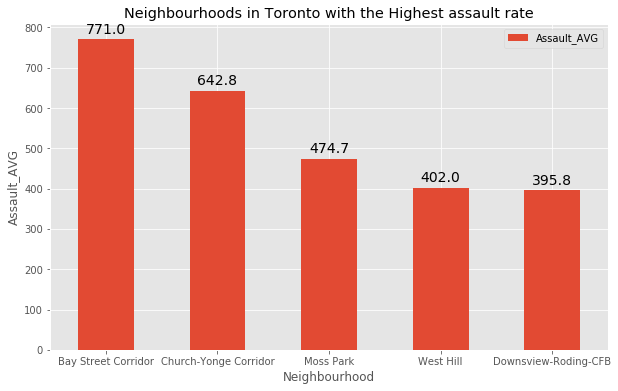

In [57]:
per_neigh_assault = toronto_assault_top5[['Neighbourhood','Assault_AVG']]

per_neigh_assault.set_index('Neighbourhood',inplace = True)

ax = per_neigh_assault.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Assault_AVG')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the Highest assault rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [72]:
toronto_assault_low10 = toronto_assault.tail(10)
toronto_assault_low10

,OBJECTID,Neighbourhood,Assault_AVG,Borough
0,1,Yonge-St.Clair,31.0,Old Toronto
33,34,Forest Hill North,30.8,Old Toronto
116,117,Bridle Path-Sunnybrook-York Mills,27.8,North York
127,128,Lawrence Park North,27.7,Old Toronto
64,65,Edenbridge-Humber Valley,27.2,Etobicoke
52,53,Kingsway South,25.8,Etobicoke
30,31,Princess-Rosethorn,24.0,Etobicoke
119,120,Lawrence Park South,22.7,Old Toronto
125,126,Markland Wood,20.7,Etobicoke
54,55,Forest Hill South,18.5,Old Toronto


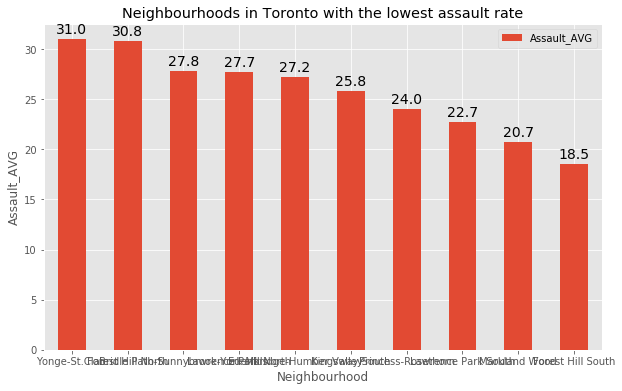

In [83]:
per_neigh_assault_low = toronto_assault_low10[['Neighbourhood','Assault_AVG']]

per_neigh_assault_low.set_index('Neighbourhood',inplace = True)

ax = per_neigh_assault_low.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Assault_AVG')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the lowest assault rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### Autotheft top and low

In [60]:
toronto_autotheft_df = pd.read_csv("https://raw.githubusercontent.com/Vishesh11/Battle-of-Neighborhood/master/Neighbourhood_Crime_Rates_(Boundary_File)_.csv", index_col=None)
toronto_autotheft_df.drop(['Assault_AVG','BreakandEnter_AVG','Robbery_AVG','TheftOver_AVG','Hood_ID','Population','Assault_2014','Assault_2015','Assault_2016','Assault_2017','Assault_2018','Assault_2019','Assault_CHG','Assault_Rate_2019','AutoTheft_2014','AutoTheft_2015','AutoTheft_2016','AutoTheft_2017','AutoTheft_2018','AutoTheft_2019','AutoTheft_CHG','AutoTheft_Rate_2019','BreakandEnter_2014','BreakandEnter_2015','BreakandEnter_2016','BreakandEnter_2017','BreakandEnter_2018','BreakandEnter_2019','BreakandEnter_CHG','BreakandEnter_Rate_2019','Homicide_2014','Homicide_2015','Homicide_2016','Homicide_2017','Homicide_2018','Homicide_2019','Homicide_AVG','Homicide_CHG','Homicide_Rate_2019','Robbery_2014','Robbery_2015','Robbery_2016','Robbery_2017','Robbery_2018','Robbery_2019','Robbery_CHG','Robbery_Rate_2019','TheftOver_2014','TheftOver_2015','TheftOver_2016','TheftOver_2017','TheftOver_2018','TheftOver_2019','TheftOver_CHG','TheftOver_Rate_2019','Shape__Area','Shape__Length'], axis = 1, inplace = True)
toronto_autotheft_df.head()

toronto_autotheft = pd.merge(toronto_autotheft_df , toronto_neigh_bor, on='Neighbourhood')
toronto_autotheft.head()

toronto_autotheft.sort_values(['AutoTheft_AVG'], ascending = False, axis = 0, inplace = True )

toronto_autotheft_top5 = toronto_autotheft.iloc[1:6]
toronto_autotheft_top5

,OBJECTID,Neighbourhood,AutoTheft_AVG,Borough
11,12,Islington-City Centre West,126.5,Etobicoke
91,92,Downsview-Roding-CFB,107.8,North York
1,2,York University Heights,106.3,North York
19,20,Humber Summit,82.3,North York
76,77,Wexford/Maryvale,63.0,Scarborough


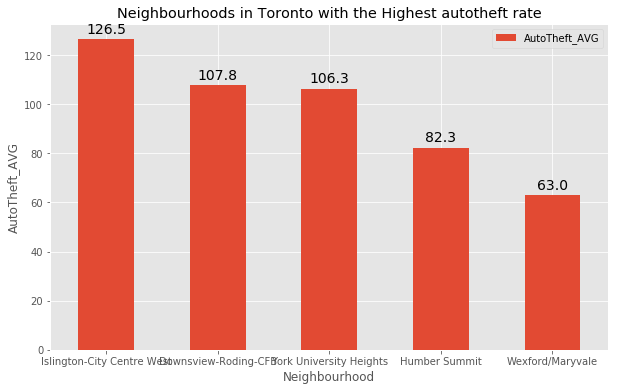

In [62]:
per_neigh_autotheft_high = toronto_autotheft_top5[['Neighbourhood','AutoTheft_AVG']]

per_neigh_autotheft_high.set_index('Neighbourhood',inplace = True)

ax = per_neigh_autotheft_high.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('AutoTheft_AVG')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the Highest autotheft rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [74]:
toronto_autotheft_low10 = toronto_autotheft.tail(10)
toronto_autotheft_low10

,OBJECTID,Neighbourhood,AutoTheft_AVG,Borough
50,51,Casa Loma,6.8,Old Toronto
102,103,Blake-Jones,6.5,Old Toronto
27,28,Ionview,6.5,Scarborough
12,13,Danforth,6.2,Old Toronto
109,110,Playter Estates-Danforth,6.2,Old Toronto
29,30,Broadview North,5.3,East York
49,50,Old East York,4.3,East York
0,1,Yonge-St.Clair,4.3,Old Toronto
112,113,Woodbine-Lumsden,3.0,East York
36,37,Guildwood,2.7,Scarborough


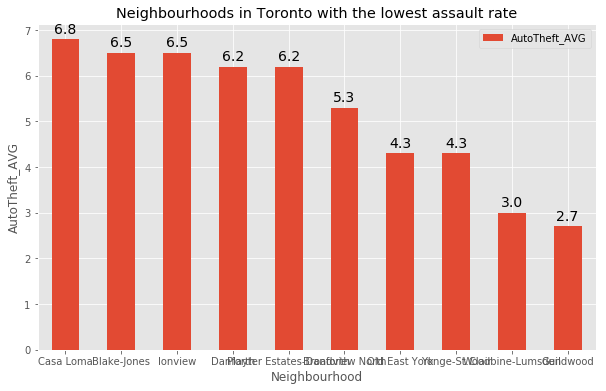

In [82]:
per_neigh_autotheft_low = toronto_autotheft_low10[['Neighbourhood','AutoTheft_AVG']]

per_neigh_autotheft_low.set_index('Neighbourhood',inplace = True)

ax = per_neigh_autotheft_low.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('AutoTheft_AVG')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the lowest assault rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### Robbery top and low

In [65]:
toronto_robbery_df = pd.read_csv("https://raw.githubusercontent.com/Vishesh11/Battle-of-Neighborhood/master/Neighbourhood_Crime_Rates_(Boundary_File)_.csv", index_col=None)
toronto_robbery_df.drop(['Assault_AVG','BreakandEnter_AVG','AutoTheft_AVG','TheftOver_AVG','Hood_ID','Population','Assault_2014','Assault_2015','Assault_2016','Assault_2017','Assault_2018','Assault_2019','Assault_CHG','Assault_Rate_2019','AutoTheft_2014','AutoTheft_2015','AutoTheft_2016','AutoTheft_2017','AutoTheft_2018','AutoTheft_2019','AutoTheft_CHG','AutoTheft_Rate_2019','BreakandEnter_2014','BreakandEnter_2015','BreakandEnter_2016','BreakandEnter_2017','BreakandEnter_2018','BreakandEnter_2019','BreakandEnter_CHG','BreakandEnter_Rate_2019','Homicide_2014','Homicide_2015','Homicide_2016','Homicide_2017','Homicide_2018','Homicide_2019','Homicide_AVG','Homicide_CHG','Homicide_Rate_2019','Robbery_2014','Robbery_2015','Robbery_2016','Robbery_2017','Robbery_2018','Robbery_2019','Robbery_CHG','Robbery_Rate_2019','TheftOver_2014','TheftOver_2015','TheftOver_2016','TheftOver_2017','TheftOver_2018','TheftOver_2019','TheftOver_CHG','TheftOver_Rate_2019','Shape__Area','Shape__Length'], axis = 1, inplace = True)
toronto_robbery_df.head()

toronto_robbery = pd.merge(toronto_robbery_df , toronto_neigh_bor, on='Neighbourhood')
toronto_robbery.head()

toronto_robbery.sort_values(['Robbery_AVG'], ascending = False, axis = 0, inplace = True )

toronto_robbery_top5 = toronto_robbery.iloc[1:6]
toronto_robbery_top5

,OBJECTID,Neighbourhood,Robbery_AVG,Borough
131,132,Moss Park,125.5,Old Toronto
93,94,Bay Street Corridor,121.3,Old Toronto
41,42,West Humber-Clairville,91.8,Etobicoke
111,112,Woburn,83.5,Scarborough
39,40,Waterfront Communities-The Island,82.2,Old Toronto


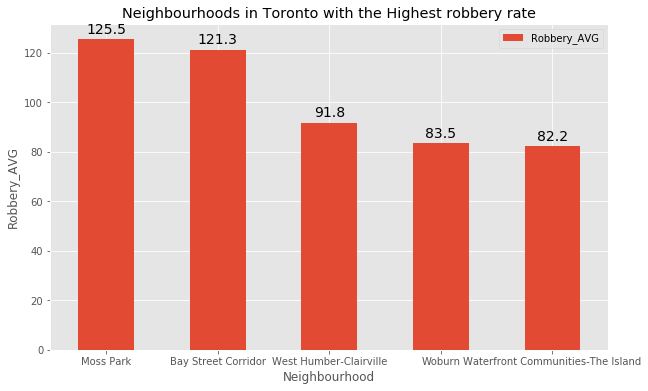

In [67]:
per_neigh_robbery_high = toronto_robbery_top5[['Neighbourhood','Robbery_AVG']]

per_neigh_robbery_high.set_index('Neighbourhood',inplace = True)

ax = per_neigh_robbery_high.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Robbery_AVG')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the Highest robbery rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [76]:
toronto_robbery_low10 = toronto_robbery.tail(10)
toronto_robbery_low10

,OBJECTID,Neighbourhood,Robbery_AVG,Borough
119,120,Lawrence Park South,5.7,Old Toronto
58,59,Humber Heights-Westmount,5.7,Etobicoke
0,1,Yonge-St.Clair,5.7,Old Toronto
50,51,Casa Loma,5.3,Old Toronto
92,93,Lambton Baby Point,5.3,York
124,125,Maple Leaf,5.2,North York
112,113,Woodbine-Lumsden,5.0,East York
127,128,Lawrence Park North,3.8,Old Toronto
45,46,Bayview Woods-Steeles,3.7,North York
116,117,Bridle Path-Sunnybrook-York Mills,3.3,North York


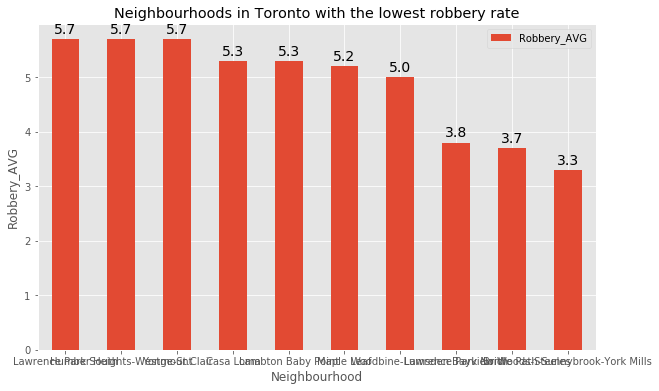

In [81]:
per_neigh_robbery_low = toronto_robbery_low10[['Neighbourhood','Robbery_AVG']]

per_neigh_robbery_low.set_index('Neighbourhood',inplace = True)

ax = per_neigh_robbery_low.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Robbery_AVG')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the lowest robbery rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### Theftover top and low

In [78]:
toronto_theftover_df = pd.read_csv("https://raw.githubusercontent.com/Vishesh11/Battle-of-Neighborhood/master/Neighbourhood_Crime_Rates_(Boundary_File)_.csv", index_col=None)
toronto_theftover_df.drop(['Assault_AVG','BreakandEnter_AVG','AutoTheft_AVG','Robbery_AVG','Hood_ID','Population','Assault_2014','Assault_2015','Assault_2016','Assault_2017','Assault_2018','Assault_2019','Assault_CHG','Assault_Rate_2019','AutoTheft_2014','AutoTheft_2015','AutoTheft_2016','AutoTheft_2017','AutoTheft_2018','AutoTheft_2019','AutoTheft_CHG','AutoTheft_Rate_2019','BreakandEnter_2014','BreakandEnter_2015','BreakandEnter_2016','BreakandEnter_2017','BreakandEnter_2018','BreakandEnter_2019','BreakandEnter_CHG','BreakandEnter_Rate_2019','Homicide_2014','Homicide_2015','Homicide_2016','Homicide_2017','Homicide_2018','Homicide_2019','Homicide_AVG','Homicide_CHG','Homicide_Rate_2019','Robbery_2014','Robbery_2015','Robbery_2016','Robbery_2017','Robbery_2018','Robbery_2019','Robbery_CHG','Robbery_Rate_2019','TheftOver_2014','TheftOver_2015','TheftOver_2016','TheftOver_2017','TheftOver_2018','TheftOver_2019','TheftOver_CHG','TheftOver_Rate_2019','Shape__Area','Shape__Length'], axis = 1, inplace = True)
toronto_theftover_df.head()

toronto_theftover = pd.merge(toronto_theftover_df , toronto_neigh_bor, on='Neighbourhood')
toronto_theftover.head()

toronto_theftover.sort_values(['TheftOver_AVG'], ascending = False, axis = 0, inplace = True )

toronto_theftover_top5 = toronto_theftover.iloc[1:6]
toronto_theftover_top5

,OBJECTID,Neighbourhood,TheftOver_AVG,Borough
93,94,Bay Street Corridor,52.3,Old Toronto
41,42,West Humber-Clairville,52.2,Etobicoke
11,12,Islington-City Centre West,40.2,Etobicoke
1,2,York University Heights,36.3,North York
22,23,Church-Yonge Corridor,33.8,Old Toronto


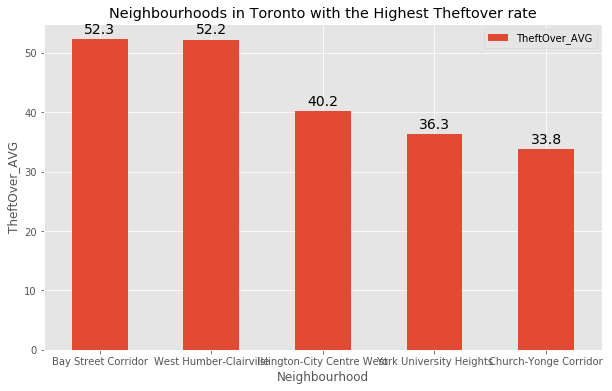

In [80]:
per_neigh_theftover_high = toronto_theftover_top5[['Neighbourhood','TheftOver_AVG']]

per_neigh_theftover_high.set_index('Neighbourhood',inplace = True)

ax = per_neigh_theftover_high.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('TheftOver_AVG')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the Highest Theftover rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [84]:
toronto_theftover_low10 = toronto_theftover.tail(10)
toronto_theftover_low10

,OBJECTID,Neighbourhood,TheftOver_AVG,Borough
57,58,Caledonia-Fairbank,1.8,York
36,37,Guildwood,1.7,Scarborough
130,131,Morningside,1.7,Scarborough
103,104,Rexdale-Kipling,1.7,Etobicoke
13,14,Rustic,1.5,North York
102,103,Blake-Jones,1.5,Old Toronto
78,79,Elms-Old Rexdale,1.5,Etobicoke
29,30,Broadview North,1.3,East York
92,93,Lambton Baby Point,1.2,York
53,54,Runnymede-Bloor West Village,1.2,Old Toronto


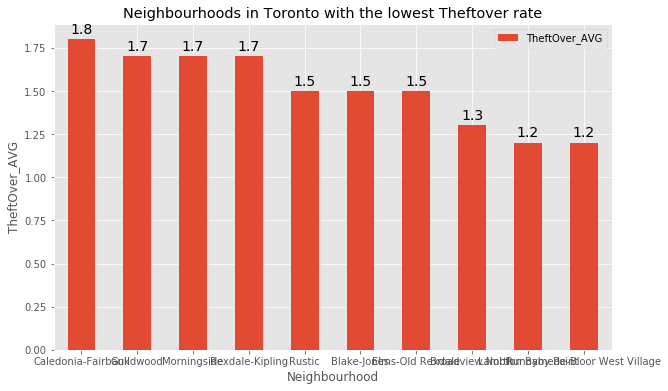

In [85]:
per_neigh_theftover_low = toronto_theftover_low10[['Neighbourhood','TheftOver_AVG']]

per_neigh_theftover_low.set_index('Neighbourhood',inplace = True)

ax = per_neigh_theftover_low.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('TheftOver_AVG')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Toronto with the lowest Theftover rate')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### Based on the above exploratory data analysis we are able to find the borough which has more crime and the borough which records less crime

### Old Toronto in also known as 'DownTown' has some area (Lawrence South Park, Younge St. Claire) which records the lowest crime in each type where as there were some area(Bay street corridor, Church Yonge corridor) which records the highest crime. 

### To start a grocery shop we need to find the place where there is more residency and low crime rate 

### On that fact Scarborough and Old Toronto both becomes the best for the location and safety

## Part 3: Restricting the rows in the data frame to Old Toronto and Scarborough

In [89]:
# Old Toronto
toronto_ot_neigh = toronto_boroughs_crime

toronto_ot_neigh = toronto_ot_neigh[toronto_ot_neigh['Borough'] == 'Old Toronto']
toronto_ot_neigh.reset_index(inplace=True, drop=True)

In [100]:
toronto_ot_neigh

,OBJECTID,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Robbery_AVG,TheftOver_AVG,Borough
0,1,Yonge-St.Clair,31.0,4.3,23.3,5.7,4.3,Old Toronto
1,7,The Beaches,93.8,16.3,49.3,20.3,6.2,Old Toronto
2,13,Danforth,72.3,6.2,37.3,20.7,3.7,Old Toronto
3,16,South Parkdale,226.5,18.7,65.3,33.0,10.0,Old Toronto
4,17,South Riverdale,244.3,30.8,108.8,49.0,21.3,Old Toronto
5,23,Church-Yonge Corridor,642.8,37.8,188.5,135.7,33.8,Old Toronto
6,27,Corso Italia-Davenport,85.3,11.5,28.3,24.2,3.7,Old Toronto
7,29,Junction Area,99.3,25.5,41.8,14.5,5.3,Old Toronto
8,32,North Riverdale,64.5,12.2,40.2,26.5,4.7,Old Toronto
9,34,Forest Hill North,30.8,15.0,36.3,9.7,2.3,Old Toronto


In [91]:
# Scarborough
toronto_s_neigh = toronto_boroughs_crime

toronto_s_neigh = toronto_s_neigh[toronto_s_neigh['Borough'] == 'Scarborough']
toronto_s_neigh.reset_index(inplace=True, drop=True)

In [92]:
toronto_s_neigh

,OBJECTID,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Robbery_AVG,TheftOver_AVG,Borough
0,6,Tam O'Shanter-Sullivan,109.7,23.0,62.7,27.7,5.5,Scarborough
1,15,Scarborough Village,168.5,17.2,41.3,25.0,2.7,Scarborough
2,22,Centennial Scarborough,46.5,9.5,19.2,7.5,2.0,Scarborough
3,24,Clairlea-Birchmount,260.5,44.5,94.2,41.0,11.7,Scarborough
4,25,Cliffcrest,110.2,16.5,48.2,23.8,4.2,Scarborough
5,28,Ionview,94.2,6.5,26.8,13.3,2.3,Scarborough
6,37,Guildwood,41.5,2.7,14.5,8.2,1.7,Scarborough
7,41,West Hill,402.0,26.5,82.5,65.2,6.7,Scarborough
8,44,Kennedy Park,219.3,22.0,45.0,46.8,7.3,Scarborough
9,64,Dorset Park,176.5,52.2,75.8,37.8,9.2,Scarborough


### From the above data we have found the areas where average crime rate is less than 60 

#### AREAS:
##### Yonge-St.Clair, Forest Hill North, Casa Loma, Runnymede-Bloor West Village, Forest Hill South, Mount Pleasant East, Lawrence Park South, Lawrence Park North, Centennial Scarborough, Guildwood, Highland Creek, Steeles

In [104]:
toronto_safest = pd.read_csv('https://raw.githubusercontent.com/Vishesh11/Battle-of-Neighborhood/master/new%20selected.csv')
toronto_safest.drop(['Hood_ID','Population','Assault_2014','Assault_2015','Assault_2016','Assault_2017','Assault_2018','Assault_2019','Assault_CHG','Assault_Rate_2019','AutoTheft_2014','AutoTheft_2015','AutoTheft_2016','AutoTheft_2017','AutoTheft_2018','AutoTheft_2019','AutoTheft_CHG','AutoTheft_Rate_2019','BreakandEnter_2014','BreakandEnter_2015','BreakandEnter_2016','BreakandEnter_2017','BreakandEnter_2018','BreakandEnter_2019','BreakandEnter_CHG','BreakandEnter_Rate_2019','Homicide_2014','Homicide_2015','Homicide_2016','Homicide_2017','Homicide_2018','Homicide_2019','Homicide_AVG','Homicide_CHG','Homicide_Rate_2019','Robbery_2014','Robbery_2015','Robbery_2016','Robbery_2017','Robbery_2018','Robbery_2019','Robbery_CHG','Robbery_Rate_2019','TheftOver_2014','TheftOver_2015','TheftOver_2016','TheftOver_2017','TheftOver_2018','TheftOver_2019','TheftOver_CHG','TheftOver_Rate_2019','Shape__Area','Shape__Length'], axis = 1, inplace = True)
toronto_safest

,OBJECTID,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Robbery_AVG,TheftOver_AVG
0,54,Runnymede-Bloor West Village,36.7,18.2,22.5,17.0,1.2
1,51,Casa Loma,37.0,6.8,26.3,5.3,4.5
2,1,Yonge-St.Clair,31.0,4.3,23.3,5.7,4.3
3,101,Mount Pleasant East,34.7,9.8,29.7,7.2,3.5
4,55,Forest Hill South,18.5,13.3,40.2,5.7,4.7
5,34,Forest Hill North,30.8,15.0,36.3,9.7,2.3
6,120,Lawrence Park South,22.7,22.3,50.2,5.7,3.7
7,128,Lawrence Park North,27.7,23.3,26.5,3.8,4.2
8,127,Steeles,39.3,25.0,56.7,9.7,3.7
9,22,Centennial Scarborough,46.5,9.5,19.2,7.5,2.0


In [105]:
toronto_safest_place = pd.merge(toronto_safest , toronto_neigh_bor, on='Neighbourhood')
toronto_safest_place

,OBJECTID,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Robbery_AVG,TheftOver_AVG,Borough
0,54,Runnymede-Bloor West Village,36.7,18.2,22.5,17.0,1.2,Old Toronto
1,51,Casa Loma,37.0,6.8,26.3,5.3,4.5,Old Toronto
2,1,Yonge-St.Clair,31.0,4.3,23.3,5.7,4.3,Old Toronto
3,101,Mount Pleasant East,34.7,9.8,29.7,7.2,3.5,Old Toronto
4,55,Forest Hill South,18.5,13.3,40.2,5.7,4.7,Old Toronto
5,34,Forest Hill North,30.8,15.0,36.3,9.7,2.3,Old Toronto
6,120,Lawrence Park South,22.7,22.3,50.2,5.7,3.7,Old Toronto
7,128,Lawrence Park North,27.7,23.3,26.5,3.8,4.2,Old Toronto
8,127,Steeles,39.3,25.0,56.7,9.7,3.7,Scarborough
9,22,Centennial Scarborough,46.5,9.5,19.2,7.5,2.0,Scarborough


In [113]:
print('Number of Neighbourhoods in Borough', len(toronto_safest['Neighbourhood'].unique()))

toronto_safest_place['Neighbourhood'].unique()

Number of Neighbourhoods in Borough 12


array(['Runnymede-Bloor West Village', 'Casa Loma', 'Yonge-St.Clair',
       'Mount Pleasant East', 'Forest Hill South', 'Forest Hill North',
       'Lawrence Park South', 'Lawrence Park North', 'Steeles',
       'Centennial Scarborough', 'Highland Creek', 'Guildwood'],
      dtype=object)

In [115]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = toronto_safest_place['Neighbourhood'].unique()

key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Toronto, Ontario, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
print(Latitude, Longitude)

#print('The geograpical coordinate of toronto are {}, {}.'.format(latitude, longitude))

[43.6517026, 43.6781015, 43.6880777, 43.7084166, 43.6935586, 43.6935586, 43.729199, 43.729199, 43.8161778, 43.7874914, 43.7901172, 43.7552251] [-79.4759978, -79.4094158, -79.3943964, -79.3901348, -79.4139023, -79.4139023, -79.4032525, -79.4032525, -79.3145378, -79.1507681, -79.1733344, -79.1982293]


In [116]:
toronto_neig_dict = {'Neighbourhood': Neighbourhood,'Latitude': Latitude,'Longitude':Longitude}
toronto_neig_geo = pd.DataFrame(data=toronto_neig_dict, columns=['Neighbourhood', 'Latitude', 'Longitude'], index=None)

toronto_neig_geo

,Neighbourhood,Latitude,Longitude
0,Runnymede-Bloor West Village,43.651703,-79.475998
1,Casa Loma,43.678101,-79.409416
2,Yonge-St.Clair,43.688078,-79.394396
3,Mount Pleasant East,43.708417,-79.390135
4,Forest Hill South,43.693559,-79.413902
5,Forest Hill North,43.693559,-79.413902
6,Lawrence Park South,43.729199,-79.403252
7,Lawrence Park North,43.729199,-79.403252
8,Steeles,43.816178,-79.314538
9,Centennial Scarborough,43.787491,-79.150768


### Fetching the Geographical co-ordiantes of Toronto to plot on Map

In [117]:
address = 'Toronto, Ontario, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


### Using Folium to plot Toronto City

In [121]:
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(toronto_neig_geo['Latitude'], toronto_neig_geo['Longitude'], toronto_neig_geo['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

### Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates:

#### This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

#### Setting Up Foursquare Credentials

In [138]:
CLIENT_ID = 'C12UMSB50X05SPYQUI1CSPEPG502DHBWGTKRYFPMDQXUDAQN'
CLIENT_SECRET = '5VOHY2HCEGFVJAOXU0MJU4CFL4YXFSAPBGRRG2DZG4WNBTOG'
VERSION = '20191101'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C12UMSB50X05SPYQUI1CSPEPG502DHBWGTKRYFPMDQXUDAQN
CLIENT_SECRET:5VOHY2HCEGFVJAOXU0MJU4CFL4YXFSAPBGRRG2DZG4WNBTOG


In [139]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)
    
  

### Generating Venues

In [140]:
toronto_venues = getNearbyVenues(names=toronto_neig_geo['Neighbourhood'],
                                   latitudes=toronto_neig_geo['Latitude'],
                                   longitudes=toronto_neig_geo['Longitude']
                                  )

Runnymede-Bloor West Village
Casa Loma
Yonge-St.Clair
Mount Pleasant East
Forest Hill South
Forest Hill North
Lawrence Park South
Lawrence Park North
Steeles
Centennial Scarborough
Highland Creek
Guildwood


### Data frame containing venues for each neighborhood in Toronto(selected places)

In [145]:
print(toronto_venues.shape)
toronto_venues.head()

(287, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Runnymede-Bloor West Village,43.651703,-79.475998,Baka Gallery Cafe,Café
1,Runnymede-Bloor West Village,43.651703,-79.475998,Bread & Roses Bakery Cafe,Bakery
2,Runnymede-Bloor West Village,43.651703,-79.475998,Zaza Espresso Bar & Gelato,Café
3,Runnymede-Bloor West Village,43.651703,-79.475998,Yogurty's,Frozen Yogurt Shop
4,Runnymede-Bloor West Village,43.651703,-79.475998,New Balance,Shoe Store


### Venue Count per neighborhood

In [146]:
toronto_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Casa Loma,23
Centennial Scarborough,2
Forest Hill North,4
Forest Hill South,4
Guildwood,4
Highland Creek,4
Lawrence Park North,53
Lawrence Park South,53
Mount Pleasant East,42


In [147]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 91 uniques categories.


### Modelling

#### One Hot Encoding to Analyze Each Neighborhood

In [148]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,...,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Runnymede-Bloor West Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Runnymede-Bloor West Village,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Runnymede-Bloor West Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Runnymede-Bloor West Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Runnymede-Bloor West Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
toronto_onehot.shape

(287, 92)

In [150]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,...,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Casa Loma,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.043478,0.000000,0.0,0.043478,0.000000,0.000000
1,Centennial Scarborough,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Forest Hill North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.00000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Forest Hill South,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.00000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Guildwood,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.25,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
5,Highland Creek,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,Lawrence Park North,0.000000,0.018868,0.037736,0.018868,0.000000,0.056604,0.037736,0.00000,0.00,...,0.075472,0.00000,0.018868,0.000000,0.000000,0.018868,0.0,0.000000,0.000000,0.000000
7,Lawrence Park South,0.000000,0.018868,0.037736,0.018868,0.000000,0.056604,0.037736,0.00000,0.00,...,0.075472,0.00000,0.018868,0.000000,0.000000,0.018868,0.0,0.000000,0.000000,0.000000
8,Mount Pleasant East,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02381,0.00,...,0.047619,0.02381,0.000000,0.000000,0.000000,0.023810,0.0,0.023810,0.000000,0.023810
9,Runnymede-Bloor West Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.075000,0.050000,0.00000,0.00,...,0.000000,0.00000,0.000000,0.025000,0.000000,0.000000,0.0,0.025000,0.000000,0.000000


In [151]:
toronto_grouped.shape

(12, 92)

### Top 5 most common venues across neighborhoods

In [153]:
top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----Casa Loma----
            venue  freq
0  Sandwich Place  0.13
1     Coffee Shop  0.09
2            Café  0.09
3  History Museum  0.09
4    Burger Joint  0.04


----Centennial Scarborough----
                 venue  freq
0                  Bar   0.5
1                 Park   0.5
2  American Restaurant   0.0
3    Mobile Phone Shop   0.0
4           Playground   0.0


----Forest Hill North----
                      venue  freq
0                Playground  0.25
1                      Bank  0.25
2                      Park  0.25
3  Mediterranean Restaurant  0.25
4       American Restaurant  0.00


----Forest Hill South----
                      venue  freq
0                Playground  0.25
1                      Bank  0.25
2                      Park  0.25
3  Mediterranean Restaurant  0.25
4       American Restaurant  0.00


----Guildwood----
                 venue  freq
0        Train Station  0.50
1     Storage Facility  0.25
2       Baseball Field  0.25
3  American Restaurant  0.00
4 

### The new dataframe and display the top 10 venues for each neighborhood.

In [154]:
def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [155]:
top10_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top10_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], top10_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Casa Loma,Sandwich Place,Coffee Shop,History Museum,Café,Historic Site,Theater,Vegetarian / Vegan Restaurant,Castle,Burger Joint,Donut Shop
1,Centennial Scarborough,Park,Bar,Yoga Studio,Frozen Yogurt Shop,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant,Fast Food Restaurant
2,Forest Hill North,Mediterranean Restaurant,Park,Bank,Playground,Yoga Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop
3,Forest Hill South,Mediterranean Restaurant,Park,Bank,Playground,Yoga Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop
4,Guildwood,Train Station,Baseball Field,Storage Facility,Yoga Studio,Fried Chicken Joint,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop


### Cluster Neighbourhoods

In [156]:
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 4, 4, 3, 0, 0, 0, 0, 0], dtype=int32)

In [157]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_neig_geo

# merge toronto_grouped with Vancouver data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Runnymede-Bloor West Village,43.651703,-79.475998,0,Café,Coffee Shop,Bakery,Pizza Place,Bank,Latin American Restaurant,Pilates Studio,Pet Store,Dance Studio,Mattress Store
1,Casa Loma,43.678101,-79.409416,0,Sandwich Place,Coffee Shop,History Museum,Café,Historic Site,Theater,Vegetarian / Vegan Restaurant,Castle,Burger Joint,Donut Shop
2,Yonge-St.Clair,43.688078,-79.394396,0,Coffee Shop,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Grocery Store,Pizza Place,Bank,Burger Joint,Café,Gym
3,Mount Pleasant East,43.708417,-79.390135,0,Pizza Place,Coffee Shop,Dessert Shop,Sushi Restaurant,Italian Restaurant,Café,Gym,Middle Eastern Restaurant,Deli / Bodega,Japanese Restaurant
4,Forest Hill South,43.693559,-79.413902,4,Mediterranean Restaurant,Park,Bank,Playground,Yoga Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop


In [158]:
# MAP

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analysis

#### Examining the results of Clusters

#### Cluster 1

In [159]:
toronto_merged.loc[ toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,43.651703,Coffee Shop,Bakery,Pizza Place,Bank,Latin American Restaurant,Pilates Studio,Pet Store,Dance Studio,Mattress Store
1,43.678101,Coffee Shop,History Museum,Café,Historic Site,Theater,Vegetarian / Vegan Restaurant,Castle,Burger Joint,Donut Shop
2,43.688078,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Grocery Store,Pizza Place,Bank,Burger Joint,Café,Gym
3,43.708417,Coffee Shop,Dessert Shop,Sushi Restaurant,Italian Restaurant,Café,Gym,Middle Eastern Restaurant,Deli / Bodega,Japanese Restaurant
6,43.729199,Sushi Restaurant,Bakery,Coffee Shop,Asian Restaurant,Fast Food Restaurant,Pub,Bank,Cosmetics Shop,Lingerie Store
7,43.729199,Sushi Restaurant,Bakery,Coffee Shop,Asian Restaurant,Fast Food Restaurant,Pub,Bank,Cosmetics Shop,Lingerie Store
10,43.790117,Pharmacy,Park,Neighborhood,Flower Shop,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant


#### Cluster 2

In [160]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,43.787491,Bar,Yoga Studio,Frozen Yogurt Shop,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant,Fast Food Restaurant


#### Cluster 3

In [161]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,43.816178,Fried Chicken Joint,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Falafel Restaurant,Fast Food Restaurant


#### Cluster 4

In [162]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,43.755225,Baseball Field,Storage Facility,Yoga Studio,Fried Chicken Joint,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop


#### Cluster 5

In [163]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,43.693559,Park,Bank,Playground,Yoga Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop
5,43.693559,Park,Bank,Playground,Yoga Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop


### Results and Discussion

###### The objective of the business problem was to help stakeholders identify one of the safest borough in Toronto, and an appropriate neighborhood within the borough to set up a commercial establishment especially a Grocery store. This has been achieved by first making use of Toronto crime data to identify a safe borugh with considerable number of neighborhood for any business to be viable. After selecting the borough it was imperative to choose the right neighborhood where grocery shops were not among venues in a close proximity to each other. We achieved this by grouping the neighborhoods into clusters to assist the stakeholders by providing them with relavent data about venues and safety of a given neighborhood.

### Conclusion

###### I have explored the crime data to understand different types of crimes in all neighborhoods of Toronto and later categorized them into different boroughs, this helped me in grouping the neighborhoods into boroughs and choose the safest borough first. Once we confirmed the borough the number of neighborhoods for consideration also comes down, we further shortlist the neighborhoods based on the common venues, to choose a neighborhood which best suits the business problem.